In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics

import pickle

import matplotlib.pyplot as plt
from skimage import io, color
import scikitplot as skplt

In [8]:
# resnet152
pickle_in = open('history_resnet152.pkl', 'rb')
history_resnet152 = pickle.load(pickle_in)

# # densenet161
# pickle_in = open('history_desnet161.pkl', 'rb')
# history_densenet161 = pickle.load(pickle_in)

<Figure size 576x1440 with 0 Axes>

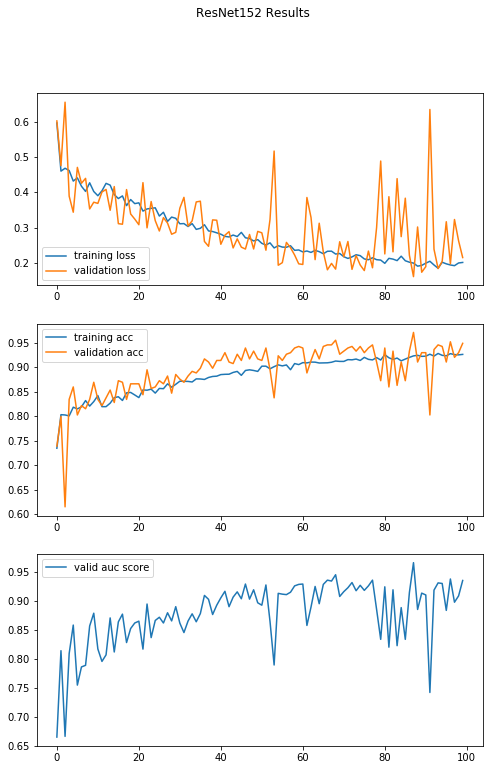

In [9]:
fig = plt.figure(figsize=(8, 20))

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,12))
fig.suptitle('ResNet152 Results')

ax1.plot(history_resnet152['train_loss'], label='training loss')
ax1.plot(history_resnet152['valid_loss'], label='validation loss')
ax1.legend()

ax2.plot(history_resnet152['train_acc'], label='training acc')
ax2.plot(history_resnet152['valid_acc'], label='validation acc')
ax2.legend()

ax3.plot(history_resnet152['valid_auc_score'], label='valid auc score')
ax3.legend()

In [3]:
# fig = plt.figure(figsize=(8, 20))

# fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,12))
# fig.suptitle('DenseNet161 Results')

# ax1.plot(history_densenet161['train_loss'], label='training loss')
# ax1.plot(history_densenet161['valid_loss'], label='validation loss')
# ax1.legend()

# ax2.plot(history_densenet161['train_acc'], label='training acc')
# ax2.plot(history_densenet161['valid_acc'], label='validation acc')
# ax2.legend()

# ax3.plot(history_densenet161['valid_auc_score'], label='valid auc score')
# ax3.legend()